I hope by now, you have installed Python and Jupyter Notebook and now know some basic shorcuts to work with it, if not look at the documentation-https://jupyter-notebook.readthedocs.io/en/stable/. 

We will next look at version controlling and some hands on tasks on python. For version controlling we will use a free open-source version control software Git. 

To install git follow https://git-scm.com/book/en/v2/Getting-Started-Installing-Git. After that create an account on Github which is a version control platform that uses git.

After you are done, fire your terminal and setup git on your local system. 
```
git config --global user.name "John Doe"
git config --global user.email johndoe@example.com
```



Now go to Github and create a repository. Get that repository to your local system. Hint- search ```git clone``` and learn about it. After creating a repository and cloning it into your local system, we will commit and push this file into the repository. So move this notebook to the cloned repo and then search how to commit and push into github repository. 

```Hint : git add, git status, git commit, git push will be helpful```


Let's get started. So this assignment is a basic assignment on Python3.0 and some basic libraries. Import all the required libraries in the cell below this.

In [20]:
import numpy as np
import time
from PIL import Image, ImageFilter
import cv2
from matplotlib import pyplot as plt

Your first task is very simple. Create a string to store your name and then append your favorite number to it. If you don't know how to get started with python basic commands, search for w3school python tutorial and have a look at them.

In [4]:
name='Jash'
name+="7"
print(name)

Jash7


Implement a python function Mult(X,Y) that takes input 2 matrices X and Y and calculates their product (Use brute force looping method).

In [5]:
def Mult(X,Y):
  product=[[0 for i in range(len(Y[0]))]for j in range(len(X))]
  for i in range(len(X)):
    for j in range(len(Y[0])):
      for k in range(len(X[0])):
        product[i][j]+=X[i][k]*Y[k][j]
  #for r in product:
   # print(r)

Create a square matrix of size 100X100 with random values from 0 to 1 using numpy(you have to import numpy at this stage) and multiply it with itself with the help of Mult(X,Y) function. Use time module to measure how long the multiplication takes. If you are stuck and don't know how to use and install new library/module Google about it.

In [ ]:
matrix=np.random.rand(100,100)
#for x in matrix:
  #print(x)
t = time.process_time()
Mult(matrix,matrix)
print("Time taken for multiplication is",time.process_time()-t,"s")

Now search how to multiply two numpy arrays using a numpy utility function. dot() will be helpful. Similary measure the time that numpy takes to make this multiplication and compare it with above. 

In [ ]:
t2=time.process_time()
prod=np.dot(matrix,matrix)
#for x in prod:
 #   print(x)
print("Time taken for second multiplication is",time.process_time()-t2,"s")

It's now time to save and make a commit, similar to above and push the current state to github. Again same set of commands.

Now you want to use your roll number instead of your name in the very first task. Go ahead and do it and make a commit, don't push it this time. Now you think that your identity should not be limited to a number, so you want to again revert back, but you want to do so without changing the code. Git has your back here. Google how to rever a commit and go back to your initial state. Hint- https://opensource.com/article/18/6/git-reset-revert-rebase-commands


Let's march ahead with python. We will use import an image(you can use any image, get it to your directory and start working). Google how to import an image in python(Search about OpenCV/PIL library). Convert the image into grayscale and show the image.(to show you can use cv2 and also you can use matplotlib, Google both the methods)

In [3]:
img=cv2.imread(r'Cat_Vibing_to_Ievan_Polkka_Street_Drummer_Meme_Template.jpeg',0)
cv2.imshow("Cat Vibing",img)
cv2.waitKey(0)
cv2.destroyAllWindows()

Now we will see git branching in action. So basically let's say you and your friend are working on the same project. One utility git provides that you both can independently work without affecting each other. To do so we create branches. So now create a new branch with branchname as your name and checkout to that branch. Hint - ```git branch``` (I am once again asking you to Google xD) Search about other options for git branch. Now whatever you will implement will be done in your branch and won't affect the entire application.

So let's do something in your branch. Now crop the image into a new image, to get a new image which is 1/4th the size of the original image.(keep only the topleft portion). Apply a gaussian blur on the cropped image and again print the image to see the effects.


In [9]:
height,width=img.shape
left=0
right=width/2
top=0
bottom=height/2
imgcropped=img[top:int(bottom),left:int(right)]
cv2.imshow("Cropped",imgcropped)
cv2.waitKey(0)
cv2.destroyAllWindows()
gausBlur = cv2.GaussianBlur(imgcropped,(5,5) ,0) 
cv2.imshow('Gaussian Blurring', gausBlur)
cv2.waitKey(0)
cv2.destroyAllWindows()

Now calculate the mean and median pixel values of the cropped image. Numpy will come in handy. Now we will do histogramming of the pixels. Search about calcHist function from cv2 library to build the histogram. Now plot the histogram using matplotlib library (don't forget to import it xP)

Mean is 163.70074652777777
Median is 162.0


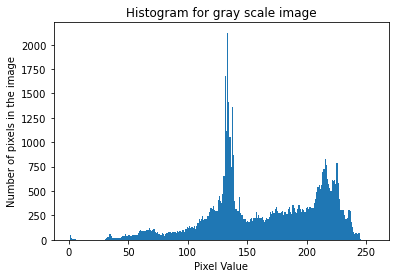

In [25]:
print("Mean is",np.mean(imgcropped[0:int(height),0:int(width),]))
print("Median is",np.median(imgcropped[0:int(height),0:int(width),]))
hist = cv2.calcHist([imgcropped],[0],None,[256],[0,256])
plt.hist(imgcropped.ravel(),256,[0,256])
plt.title('Histogram for gray scale image')
plt.xlabel('Pixel Value')
plt.ylabel('Number of pixels in the image')
plt.show()

So now you have completed working on your cropped Image. That brings you back to commit and push. So here you have to push from your branch only, because you have committed on that branch. Google how to do that. 

Impressed with your work, you finally decided that your work on your branch should be there on the main project(which is the main branch). So you want to merge your branch to main branch. Google how to do that. ```Hint - git merge```. Here do find out about merge conflicts(beleive me you don't want them). Again a merge command is itself a commit, so you have to again push it to github. Now finally we are in the main branch. You can use another utility command ```git log``` to see your entire commit history.

Let's now do some so called "cool" stuff with the image to realise the chadness of python libraries. In the original image(not the cropped one) we will do edge detection(we will use canny edge detection method which is a common method). Surprisingly openCV handles it very easily. To know how - https://docs.opencv.org/master/da/d22/tutorial_py_canny.html .

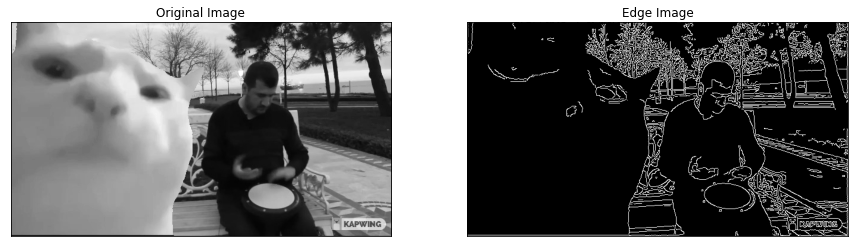

In [43]:
plt.figure(figsize=(15,15))
edges = cv2.Canny(img,50,100)
plt.subplot(1, 2, 1),plt.imshow(img,cmap='gray')
plt.title('Original Image'),plt.xticks([]),plt.yticks([])
plt.subplot(1,2,2),plt.imshow(edges,cmap='gray')
plt.title('Edge Image'),plt.xticks([]),plt.yticks([])
plt.show()

It's done ? Not yet. This exercise was just to get you familiar with python libraries and give an introduction to python. There are literally infite number of utility libraries and functions that have been built for python users. You can even publish your own library for the open-source community(how? - https://realpython.com/pypi-publish-python-package/). But one flaw of python is that it is still quite slow, Julia is an upcoming similar nascent language which performs better with this regard, do Google about it)

NOTE - IF YOU HAVE ANY DOUBTS REGARDING ASSIGNMENTS/COURSES, FEEL FREE TO ASK/HELP YOUR COMENTEES (preferably) AND MENTORS. WE WOULD LOVE TO WORK IN A COLLABORATIVE WAY.